In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gpd
import seaborn as sns

In [2]:
listings = pd.read_csv('./madrid_data/listings.csv')
display(listings.head(), listings.describe())

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40381,-3.74130,Private room,31.0,4,33,2018-07-15,0.29,2,233,0,NaN
1,204570,Lovely 110m2 home - Best location!,1004721,Alex,Centro,Cortes,40.41520,-3.69668,Entire home/apt,180.0,6,103,2023-07-12,0.68,1,10,2,NaN
2,24805,Gran Via Studio Madrid,346366726,Alvaro,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92.0,5,35,2024-02-28,0.31,1,91,10,NaN
3,205199,Tafari Gran Via,1008659,Nuria,Centro,Universidad,40.42116,-3.70384,Entire home/apt,65.0,7,333,2024-02-25,2.18,4,334,26,VT-121
4,209373,Attic in the Heart of Madrid-WIFI,1031664,José,Centro,Embajadores,40.41126,-3.70347,Private room,32.0,1,77,2023-07-02,0.52,1,174,18,NaN


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,2.602400e+04,2.602400e+04,26024.000000,26024.000000,20688.000000,26024.000000,26024.000000,20420.000000,26024.000000,26024.000000,26024.000000
mean,4.702587e+17,2.255068e+08,40.421439,-3.693995,137.574294,7.901322,43.674416,1.781481,26.049185,160.112781,13.718529
std,4.587669e+17,1.886542e+08,0.023570,0.027798,312.584149,35.341805,82.898911,1.876607,60.016049,127.148976,21.117676
min,2.185300e+04,1.745300e+04,40.331397,-3.832059,8.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3.326436e+07,4.225538e+07,40.409300,-3.707480,61.000000,1.000000,1.000000,0.380000,1.000000,25.000000,0.000000
50%,6.013722e+17,1.836910e+08,40.420130,-3.701057,99.000000,2.000000,10.000000,1.170000,3.000000,159.000000,4.000000
75%,9.281098e+17,4.149731e+08,40.431480,-3.685421,150.000000,3.000000,47.000000,2.590000,14.000000,271.000000,20.000000
max,1.117381e+18,5.679689e+08,40.535530,-3.545904,21000.000000,1125.000000,1027.000000,28.730000,300.000000,365.000000,288.000000


In [3]:
calendar= pd.read_csv('./madrid_data/calendar.csv')
display(calendar.head(), calendar.describe() )

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,604150,2024-03-22,f,$115.00,NaN,4,30
1,604150,2024-03-23,f,$115.00,NaN,4,30
2,604150,2024-03-24,f,$115.00,NaN,4,30
3,604150,2024-03-25,f,$115.00,NaN,4,30
4,604150,2024-03-26,f,$115.00,NaN,4,30


,listing_id,adjusted_price,minimum_nights,maximum_nights
count,9.498760e+06,0.0,9.498760e+06,9.498760e+06
mean,4.702587e+17,NaN,8.866202e+00,1.634387e+05
std,4.587581e+17,NaN,3.462135e+01,1.869589e+07
min,2.185300e+04,NaN,1.000000e+00,1.000000e+00
25%,3.326436e+07,NaN,1.000000e+00,3.650000e+02
50%,6.013722e+17,NaN,2.000000e+00,3.650000e+02
75%,9.281098e+17,NaN,4.000000e+00,1.125000e+03
max,1.117381e+18,NaN,1.409000e+03,2.147484e+09


In [4]:
neighbourhoods = pd.read_csv('./madrid_data/neighbourhoods.csv')
display(neighbourhoods.head(), neighbourhoods.describe(include='O'))

,neighbourhood_group,neighbourhood
0,Arganzuela,Acacias
1,Arganzuela,Atocha
2,Arganzuela,Chopera
3,Arganzuela,Delicias
4,Arganzuela,Imperial


,neighbourhood_group,neighbourhood
count,128,128
unique,21,128
top,Ciudad Lineal,Acacias
freq,9,1


#### Data cleaning and merging 


In [5]:
# Check duplicates
listings.duplicated().sum()

0

In [7]:
# Check missing values
listings.isna().sum()
#Deal with missing values

listings = listings.dropna(subset=['host_name'])
# Impute values
listings['price'].fillna(listings['price'].mean(), inplace=True)

listings['reviews_per_month'].fillna(listings['reviews_per_month'].median(), inplace=True)

listings['last_review'].fillna(method='ffill', inplace=True)


# Check missing values again
listings.isna().sum()




/var/folders/xq/xl6fm5356nj9dmz14z91xtz40000gn/T/ipykernel_2235/144415409.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  listings['price'].fillna(listings['price'].mean(), inplace=True)
/var/folders/xq/xl6fm5356nj9dmz14z91xtz40000gn/T/ipykernel_2235/144415409.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           23200
dtype: int64

In [8]:
listings.drop(columns=['license'], inplace=True)

listings.to_csv('./madrid_data/listings_cleaned.csv', index=False)

In [9]:
print('duplicates=', neighbourhoods.duplicated().sum())
display('missing values:',neighbourhoods.isna().sum())

duplicates= 0


'missing values:'

neighbourhood_group    0
neighbourhood          0
dtype: int64

In [10]:
# Read geojson file
neighbourhood_geojson= gpd.read_file('./madrid_data/neighbourhoods.geojson')


# Merge geojson and csv files 
loc_madrid= listings.merge(neighbourhood_geojson, on=['neighbourhood','neighbourhood_group'])

#convert to GeoDF
madrid_gdf=gpd.GeoDataFrame(loc_madrid)
madrid_gdf.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,geometry
0,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40381,-3.74130,Private room,31.0,4,33,2018-07-15,0.29,2,233,0,"MULTIPOLYGON (((-3.72265 40.40583, -3.72274 40..."
1,204570,Lovely 110m2 home - Best location!,1004721,Alex,Centro,Cortes,40.41520,-3.69668,Entire home/apt,180.0,6,103,2023-07-12,0.68,1,10,2,"MULTIPOLYGON (((-3.69805 40.41928, -3.69654 40..."
2,24805,Gran Via Studio Madrid,346366726,Alvaro,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92.0,5,35,2024-02-28,0.31,1,91,10,"MULTIPOLYGON (((-3.70117 40.42133, -3.70164 40..."
3,205199,Tafari Gran Via,1008659,Nuria,Centro,Universidad,40.42116,-3.70384,Entire home/apt,65.0,7,333,2024-02-25,2.18,4,334,26,"MULTIPOLYGON (((-3.70117 40.42133, -3.70164 40..."
4,209373,Attic in the Heart of Madrid-WIFI,1031664,José,Centro,Embajadores,40.41126,-3.70347,Private room,32.0,1,77,2023-07-02,0.52,1,174,18,"MULTIPOLYGON (((-3.70393 40.41431, -3.70286 40..."


In [11]:
#Calendar

calendar.isna().sum()
calendar.drop(columns=['adjusted_price'], inplace=True)

In [12]:
calendar['date']= pd.to_datetime(calendar['date'])
calendar['price']=calendar['price'].replace('[\$,]','',regex=True).astype(float)
calendar.rename(columns={'listing_id':'id'}, inplace=True)



### Price Distribution

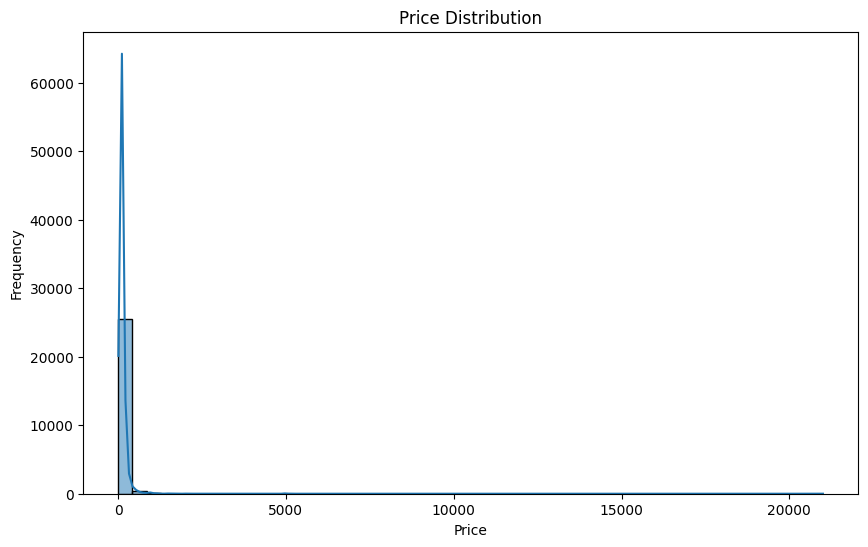

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(listings['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [14]:
price_distribution = listings.groupby('room_type')['price'].describe()
display(price_distribution)

# Unique room_type
print('The room type are: ',listings['room_type'].unique())

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,17032.0,159.964282,319.162237,8.0,94.0,133.000000,159.000000,21000.0
Hotel room,108.0,200.545849,225.813809,30.0,116.0,137.574294,155.000000,1149.0
Private room,8492.0,92.578464,167.241934,8.0,37.0,62.000000,137.574294,9000.0
Shared room,388.0,122.000569,211.100537,10.0,28.0,47.000000,137.574294,1500.0


The room type are:  ['Private room' 'Entire home/apt' 'Shared room' 'Hotel room']


In [15]:
fig = px.box(listings, x='room_type', y='price', title='Price Distribution by Property Type - Boxplot',
             labels={'room_type':'Property Type', 'price':'Price'}, color='room_type')

fig.update_yaxes(range=[0,500])
fig.show()

#histogram
fig= px.histogram(listings, x='price', color='room_type', title='Price Distribution by Property Type - Histogram',
                  labels={'price':'Price', 'room_type':'Property Type'}, barmode='overlay', histnorm='density')
fig.update_xaxes(range=[0,500])
fig.show()